**Notes and References**
This is my personal android dev learning notebook.

The majority of the code from a handler video tutorial by Coding in flow. Link to the original tutorial is provided below. Have fun learning :) !


- Coding in flow (2019) Looper, MessageQueue & Handler Explained - Android Studio Tutorial https://www.youtube.com/watch?v=TN-CGfzvBhc&t=344s&ab_channel=CodinginFlow

# Important Concepts


## 1 UI

### `android:orientation="vertical"`

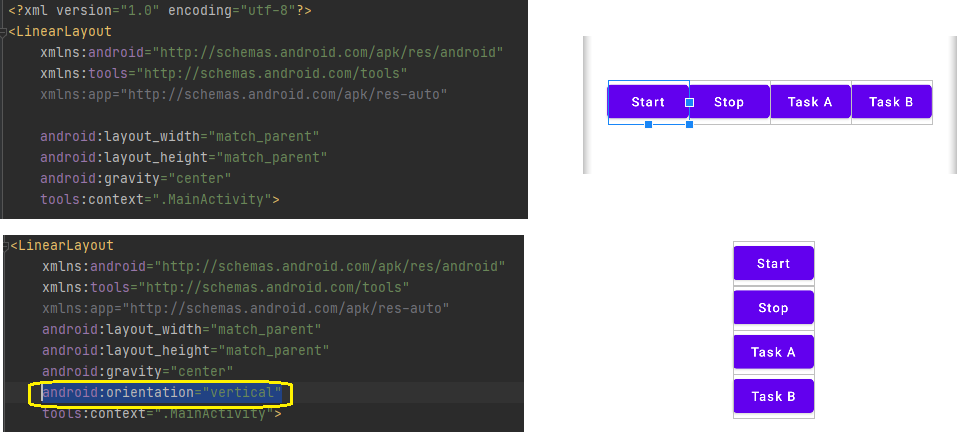

In [ ]:
handler = "/content/here/MyDrive/Android/Handler/UI orientation.png"
show_img(handler)

### `logtag`

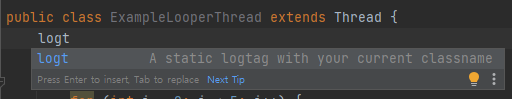

In [ ]:
img = "/content/here/MyDrive/Android/Handler/logtag.png"
show_img(img)

### `fori`

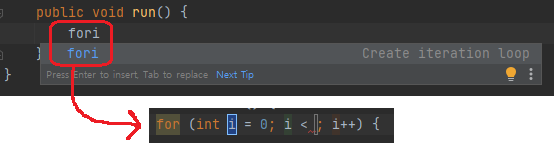

In [ ]:
img = "/content/here/MyDrive/Android/Handler/fori.png"
show_img(img)

### Wire function call to the button in `UI`

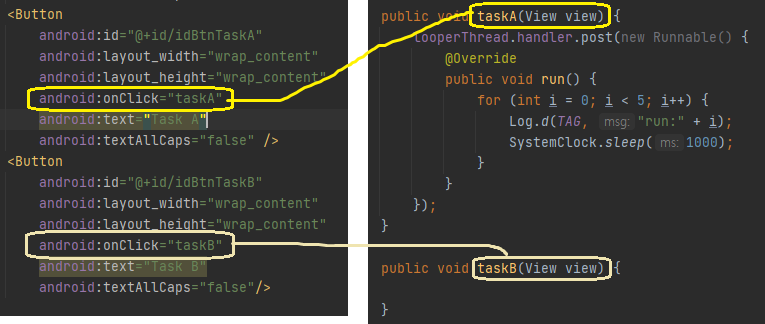

In [ ]:
img = "/content/here/MyDrive/Android/Handler/wire functions in ui.png"
show_img(img)

# 1 Thread

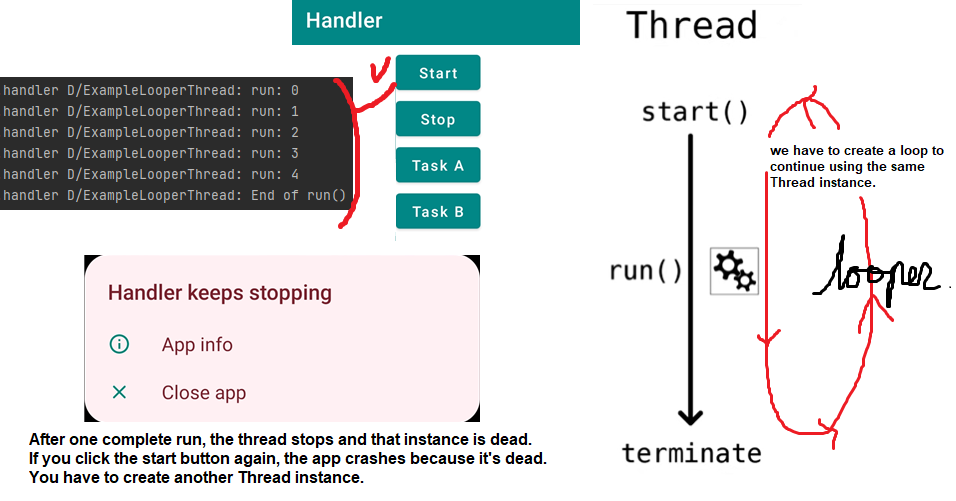

In [ ]:
thread = "/content/here/MyDrive/Android/Handler/loopless single thread.png"
show_img(thread)

## 1) Loopless single `Thread`

In [ ]:
# This thread will run only once because it doesn't have a looper associated with it.

public class ExampleLooperThread extends Thread {
    private static final String TAG = "ExampleLooperThread";

    public Handler handler;

    @Override
    public void run() {

        for (int i = 0; i < 5; i++) {
            Log.d(TAG, "run: " + i);
            # same as thread.sleep()
            # the difference is, SystemClock catches exception internally.
            # so the code looks more neat.
            SystemClock.sleep(1000);
        }

        Log.d(TAG, "End of run()");

    }
}

## 2) `Thread` with `Looper`
- `Looper.prepare();`: This call adds a Looper to the background Thread, and automatically creates a MessageQueue.
  - Without this call, you will get an error messege: 
    - `"Can't create handler inside thread Thread[Thread-6,5,main] that has not called Looper.prepare()"`.

In [ ]:
public class ExampleLooperThread extends Thread {
    private static final String TAG = "ExampleLooperThread";

    public Handler handler;

    @Override
    public void run() {

        Looper.prepare();               # The order matters. Looper should be called  
                                        # before a handler is instantiated. 
        handler = new Handler();        # Otherwise this Handler cannot find the looper for its thread. 

        Looper.loop();                  # starts the infinite for loop.

        Log.d(TAG, "End of run()");     # This line will never execute as long as the loop keeps running.

    }
}

## Looper

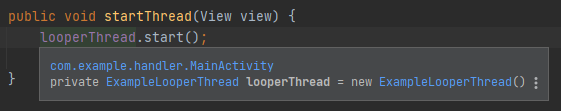

In [ ]:
thread = "/content/here/MyDrive/Android/Handler/looperThread.png"
show_img(thread)

### `Looper.quit()`

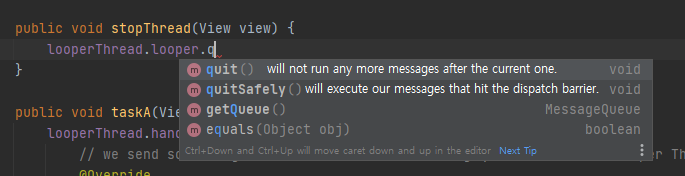

In [ ]:
quit = "/content/here/MyDrive/Android/Handler/looper quit.png"
show_img(quit)

# 2 Handler

A handler instance starts, executes some work, and terminates. 
- `start()`
  - `run()`
  - terminates.  

After an instance terminates, we can't use the same object again. A new object has to be instantiated. 


When we initialise the handler in the `run()` method, it will be executed in the `background thread`. So this handler should be associated with the `MessageQueue` of the `background thread`.

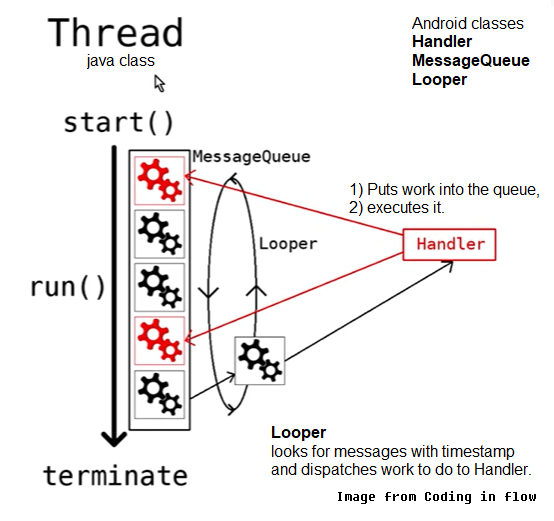

In [ ]:
handler = "/content/here/MyDrive/Android/Handler/handler concept.png"
show_img(handler)

### Attach the `Handler` to a `Looper`
- When creating a Handler, it is always necessary to pass a `Looper` in "to attach" the `Handler` to a sepcific `Looper`, which is, in turn, assigned to a specific `Thread`. 
- `Handler` is, essentially, an assistant that helps the operation of a `Thread` in loop. So it is important to assign it to a specific `Thread` with its own `Looper`.

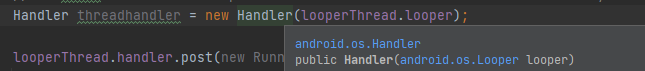

In [ ]:
handler = "/content/here/MyDrive/Android/Handler/handler to looper.png"
show_img(handler)

## `Handler` in action
because we have access to the `looperThread` in `stopThead()`, we can create a handler on any thread (e.g. UI). This Handler below (`threadHandler`) will be attached to the UI thread.
but we can also pass the Looper to the `Handler constructor` in ordre to bind the `Looper` to a different `Thread` than we are currently on.

Compare the two snippets below.

In [ ]:
# Before creating a Handler - run() is run through the handler of the looper.

    public void taskA(View view) {
        # Looper's handler 
        looperThread.handler.post(new Runnable() {
            # we send something from UI Thread to the MessageQueue of our new Looper Thread
            @Override
            public void run() {
                for (int i = 0; i < 5; i++) {
                    Log.d(TAG, "run:" + i);
                    SystemClock.sleep(1000);
                }
            }
        });
    }

In [ ]:
# After creating a Handler - ThreadHandler (attached to the looper) directly handles run().

    public void taskA(View view) {

        Handler threadhandler = new Handler(looperThread.looper);
        # Handler in place of looper.
        threadHandler.post(new Runnable() {
            // we send something from UI Thread to the MessageQueue of our new Looper Thread
            @Override
            public void run() {
                for (int i = 0; i < 5; i++) {
                    Log.d(TAG, "run:" + i);
                    SystemClock.sleep(1000);
                }
            }
        });
    }

# Error Notes

## Looper Handler with no loop...?

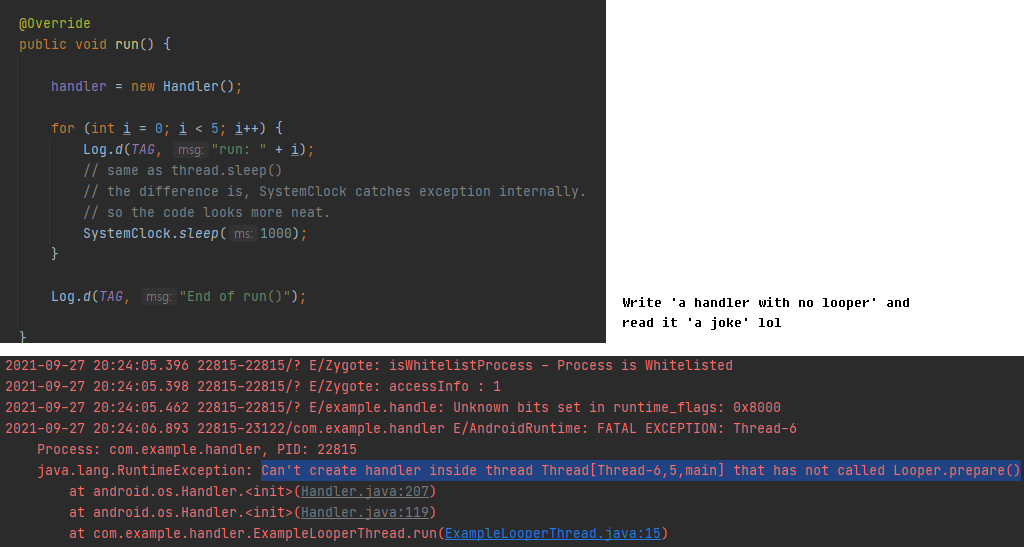

In [ ]:
handler = "/content/here/MyDrive/Android/Handler/handler no looper.png"
show_img(handler)